# Introducción a los optimizadores con PyTorch

Lo que sigue es un artículo entresacado de <a href="https://machinelearningmastery.com/using-optimizers-from-pytorch/?utm_source=drip&utm_medium=email&utm_campaign=Using+optimizers+from+PyTorch&utm_content=Using+optimizers+from+PyTorch" target="_blank"> este enlace </a>.

**NOTA**: De este mismo autor se pueden encontrar los siguientes enlaces:


* <a href="https://machinelearningmastery.com/training-and-validation-data-in-pytorch/?utm_source=drip&utm_medium=email&utm_campaign=Using+optimizers+from+PyTorch&utm_content=Using+optimizers+from+PyTorch" target="_blank"> Training and Validation Data in PyTorch </a>

* <a href="https://machinelearningmastery.com/mini-batch-gradient-descent-and-dataloader-in-pytorch/?utm_source=drip&utm_medium=email&utm_campaign=Using+optimizers+from+PyTorch&utm_content=Using+optimizers+from+PyTorch" target="_blank"> Mini-Batch Gradient Descent and DataLoader in PyTorch </a>.


La optimización es un proceso en el que tratamos de encontrar el mejor conjunto posible de parámetros para un modelo de aprendizaje profundo. Los optimizadores generan nuevos valores de parámetros y los evalúan utilizando algún criterio para determinar la mejor opción. Al ser una parte importante de la arquitectura de la red neuronal, los optimizadores ayudan a determinar los mejores pesos, sesgos u otros hiperparámetros que darán como resultado el resultado deseado.

Hay muchos <a href="https://pytorch.org/docs/stable/optim.html" target="_blank"> tipos de optimizadores disponibles en PyTorch </a>, cada uno con sus propias fortalezas y debilidades. Estos incluyen Adagrad, Adam, RMSProp, etc.

En este artículo de aprenderá:

* Cómo se pueden implementar optimizadores usando algunos paquetes en PyTorch.

* Cómo puede importar la clase lineal y la función de pérdida del paquete 'nn' de PyTorch.

* Cómo se puede implementar Stochastic Gradient Descent y Adam (el optimizador más utilizado) utilizando el paquete 'optim' en PyTorch.

* Cómo puede personalizar los pesos y sesgos del modelo.

## Preparación de datos.

Comencemos importando las bibliotecas que usaremos en este tutorial.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

Usaremos una clase de datos personalizada. Los datos están en una línea con valores con valores entre -5 y 5 pendiente y sesgo -5 y 1 respectivamente. Además, agregaremos el ruido con los mismos valores x y entrenaremos nuestro modelo para estimar esta línea ([ver apartado](dataset)).

In [2]:
# Creating our dataset class
class Build_Data(Dataset):    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        # Aquí vemos que pendiente es -5 y sesgo 1
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len

Ahora usémoslo para crear nuestro objeto de conjunto de datos y trazar los datos.

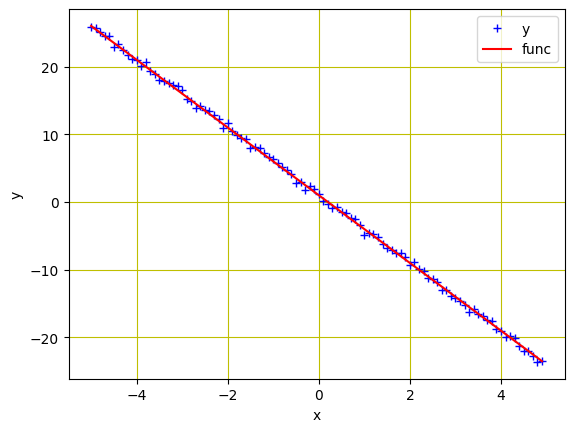

In [3]:
# Create dataset object
data_set = Build_Data()

# Plot and visualizing the data points
plt.plot(data_set.x.numpy(), data_set.y.numpy(), 'b+', label = 'y')
plt.plot(data_set.x.numpy(), data_set.func.numpy(), 'r', label = 'func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

## Construcción modelo y función de pérdida

PyTorch nos permite hacer precisamente crear el modelo y la función de pérdida con solo unas pocas líneas de código. Así es como importaremos nuestro modelo de regresión lineal integrado y la función  de pérdida con paquete nn de PyTorch

In [4]:
# Creación del modelo
model = torch.nn.Linear(1, 1)
# Cración función pérdida
criterion = torch.nn.MSELoss()

Los parámetros del modelo se aleatorizan en la creación. Esto lo podemos comprobar con lo siguiente:

In [5]:

print(list(model.parameters()))

[Parameter containing:
tensor([[0.8050]], requires_grad=True), Parameter containing:
tensor([0.2376], requires_grad=True)]


Si bien PyTorch inicializará aleatoriamente los parámetros del modelo, también podemos personalizarlos para usar los nuestros. Podemos establecer nuestros pesos y sesgos de la siguiente manera. **Tenga en cuenta que rara vez necesitamos hacer esto en la práctica**.

In [6]:
model.state_dict()['weight'][0] = -10
model.state_dict()['bias'][0] = -20

In [7]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-10.]], requires_grad=True), Parameter containing:
tensor([-20.], requires_grad=True)]


Antes de comenzar el entrenamiento, creemos un objeto *DataLoader* para cargar nuestro conjunto de datos en la canalización.

In [8]:

# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)

## Entrenamiento modelo

Para usar el optimizador de nuestra elección, podemos importar el paquete *optim* desde PyTorch. Incluye varios algoritmos de optimización de parámetros de última generación que se pueden implementar con una sola línea de código. Como ejemplo, el **descenso de gradiente estocástico (SGD)** está disponible de la siguiente manera.

In [9]:
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Como entrada, proporcionamos *model.parameters()* al constructor para indicar qué optimizar. También definimos el tamaño del paso o tasa de aprendizaje ( lr).

Para ayudar a visualizar el progreso del optimizador más tarde, creamos una lista vacía para almacenar la pérdida y dejamos que nuestro modelo entrene durante 20 epoch.

In [10]:
loss_SGD = []
n_iter = 20

for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_SGD.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

Arriba, alimentamos las muestras de datos en el modelo para la predicción y calculamos la pérdida. Los gradientes se calculan durante el paso hacia atrás y los parámetros se optimizan. Si bien en sesiones anteriores usamos algunas líneas de código adicionales para actualizar los parámetros y poner a cero los gradientes, las funciones zero_grad()y step()métodos de PyTorch del optimizador hacen que el proceso sea conciso.

Puede aumentar el argumento *batch_size* en el DataLoaderobjeto anterior para el descenso de gradiente de mini lotes

## Entrenamiento con optimizador Adam

Adam es uno de los optimizadores más utilizados para entrenar modelos de aprendizaje profundo. Es rápido y bastante eficiente cuando tienes muchos datos para entrenar. Adam es un optimizador con impulso que puede funcionar mejor que SGD cuando el modelo es complejo, como en la mayoría de los casos de aprendizaje profundo.

En PyTorch, reemplazar el optimizador SGD anterior con el optimizador Adam es tan simple como sigue. Si bien todos los demás pasos serían los mismos, solo necesitamos reemplazar el SGD()método con Adam()para implementar el algoritmo.

In [11]:

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Del mismo modo, definiremos el número de iteraciones y una lista vacía para almacenar la pérdida del modelo. Entonces podemos ejecutar nuestro entrenamiento.

In [12]:
...
loss_Adam = []
n_iter = 20

for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_Adam.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

Pongamos todo el segundo proceso en un solo block de código

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len

# Create dataset object
data_set = Build_Data()

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()

# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

loss_Adam = []
n_iter = 20

for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_Adam.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

## Gráficos

Hemos implementado con éxito los optimizadores SGD y Adam para el entrenamiento de modelos. Visualicemos cómo disminuye la pérdida del modelo en ambos algoritmos durante el proceso de entrenamiento, que se almacenan en las listas loss_SGDy loss_Adam:

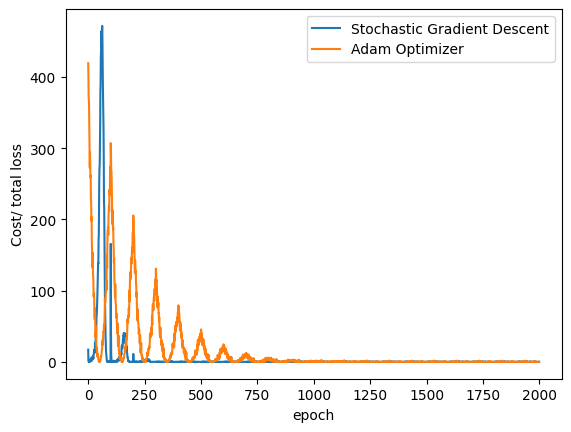

In [14]:

plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
plt.plot(loss_Adam,label = "Adam Optimizer")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

Puede ver que SGD converge más rápido que Adam en los ejemplos anteriores. Esto se debe a que estamos entrenando un modelo de regresión lineal, en el que el algoritmo proporcionado por Adam está sobrecargado.